# Tema 3.4: Soluciones iterativas

Para los problemas de búsqueda hemos formulado hasta ahora la solución como una secuencia de acciones a realizar para llegar desde un estado inicial $S$ a un estado meta $G$ en entornos deterministas, conocidos y observables, pero ¿qué pasa si, como en el caso de los CSPs, lo que nos interesa es el estado meta y no el camino? Sería conveniente entonces realizar una **búsqueda local** sobre el espacio de estados de tal manera que evaluemos y modifiquemos uno o más estados actuales en lugar de explorar rutas de forma sistemática desde un estado inicial. La familia de métodos de búsqueda local incluyen métodos inspirados por la física estadística y la biología evolutiva.

## Búsqueda Local

Si el camino a la meta no importa, podríamos considerar una distinta clase de algoritmos que no se preocupan por el camino a la meta. Los algoritmos de **búsqueda local** operan utilizando un sólo nodo único (en lugar de múltiples caminos almacenados en algúna estructura de datos como los métodos de búsqueda vistos en el tema 2) y generalmente se mueven sólo hacia los vecinos de aquel nodo. Usualmente, los caminos seguidos por la búsqueda no son almacenados. A pesar de que los algoritmos de búsqueda local no son sistemáticos, estos tienen dos ventajas clave sobre los sistemáticos:

 * Utilizan muy poca memoria (usualmente constante)
 * Tipicamente pueden encontrar soluciones razonables en espacios de estados grandes o continuos (infinitos por naturaleza) para los cuales los algoritmos sistemáticos no se adecuan.
 
Además de ser útiles para hallar metas, también son prácticos para la solución de **problemas de optimización**, en los cuales la meta es encontrar el mejor estado según una **función objetivo**. Este nuevo enfoque es de mucha utilidad pues usualmente muchos problemas no se adaptan a la formulación de un problema de búsqueda al carecer de una prueba de meta y de costos asociados a la transición de estados; piense en la evolución Darwiniana, donde la función objetivo a optimizar puede ser modelada como la aptitud de reproducción y claramente no exíste una prueba de meta.

Para comprender a la búsqueda local, es útil considerar el paisaje o **terreno del espacio de estados**. Un terreno o paisaje tiene *localidades* (definidas por el estado) y *elevación* (definida por el valor de la heurística de la función costo o función objetivo). Si la elevación corresponde al costo, lo que nos compete entonces es hallar el menor valle en el terreno del espacio de estados, un **mínimo global**; si la elevación corresponde a una función objetivo, entonces el objetivo es encontrar la cresta más elevada, un **máximo global**. Los algoritmos de búsqueda local exploran este terreno. Una búsqueda local **completa** siempre encuentra una meta si es que esta exíste; un algoritmo **óptimo** siempre encuentra un máxmimo/mínimo global.

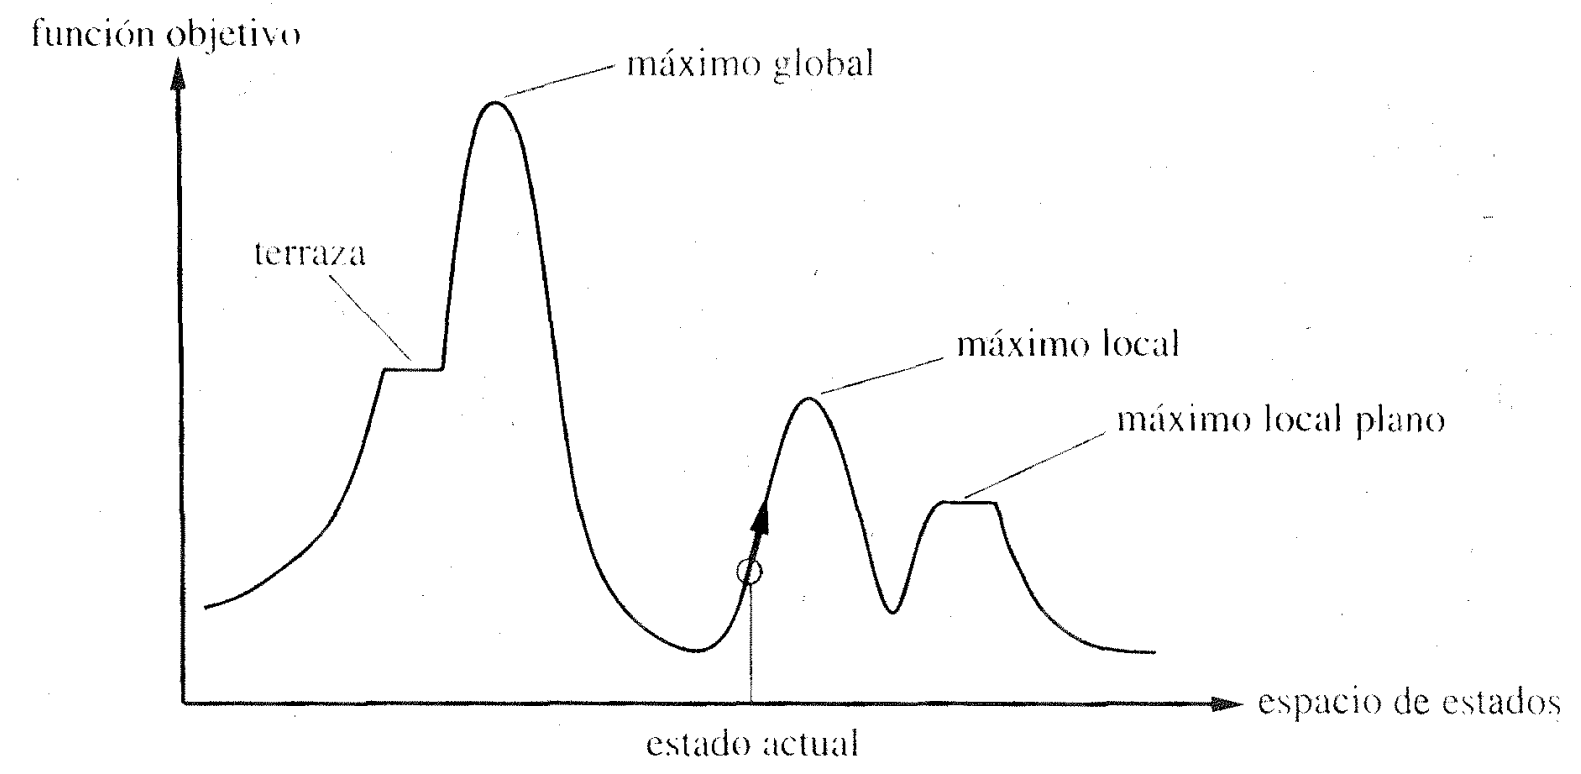
**El terreno de un espacio de estados de una sola dimensión en el que la elevación corresponde a la función objetivo. La meta es encontrar el máximo global.**

Los algoritmos que realizan búsqueda local resultan ser muy efectivos para solucionar CSPs. Estos utilizan una formulación de estado completo: el estado inicial asigna un valor a todas las variables, y la búsqueda cambia el valor de las variables una por una.

Llevémos esta idea al problema de las N = 8 reinas:

Sea un tablero de ajedrez de 8x8;

**Estados:** Todos los posibles arreglos de *n* reinas $(0 \leq n \leq 8)$, una por columna empezando desde la columna más a la izquierda, sin ninguna reina atacandose entre si.

**Estado inicial:** Alguna configuración del tablero con 8 reinas.

**Acciones:** Agregar una reina en la columna más a la izquierda disponible de tal manera que no sea atacada por otra reina ya asignada.

**Modelo te transición:** Regresa un tablero con la reina recién agregada.

**Pureba de meta:** Configuración del tablero con 8 reinas, una por cada columna, donde ninguna esté siendo atacada por otra reina.

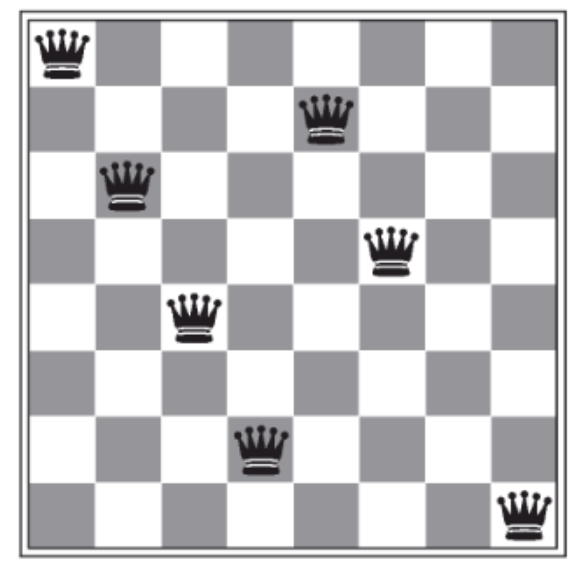

Planteando el problema como un CSP:

$X = \{ R_1, R_2, R_3, R_4, R_5, R_6, R_7, R_8 \}$

$D = \{1, 2, 3, 4, 5, 6, 7, 8\}$

$C = \{ Alldiff(R_1, R_2, R_3, R_4, R_5, R_6, R_7, R_8), NoDiag(R_1, R_2), NoDiag(R2, R3), NoDiag(R4, R5), NoDiag(R5, R6), NoDiag(R7, R8) \}$

Donde $NoDiag(R_i, R_j)$ se define como $\langle (R_i, R_j), R_j = R_i + 1 \iff R_i < n \quad \lor \quad R_j =R_i - 1 \iff R_i > 0 \rangle$

Si empleamos la estrategia de búsqueda local, al inicio el estado inicial es una asignación a cada una de las variables. Como es de esperarse, este estado inicial usualmente es erroneo. La estrategia aplicada entonces busca disminuir el número de restricciones violadas de forma iterativa hasta que sean nulas.

## Solución por Conflictos Mínimos

Ya tenémos un método de búsqueda que podemos emplear para resolver el problema de forma iterativa pero, ¿por dónde empezamos la búsqueda si el estado se encuentra ya 'completo'?. Recordando que tenemos que iterar sobre las variables que se encuentran en conflicto para resolver el problema, la heurística más obvia a emplear es seleccionar el valor que entra en mínimos conflictos para con otras variables. Este algoritmo se conoce como **Min-Conflicts** y su pseudocódigo se presenta a continuación.

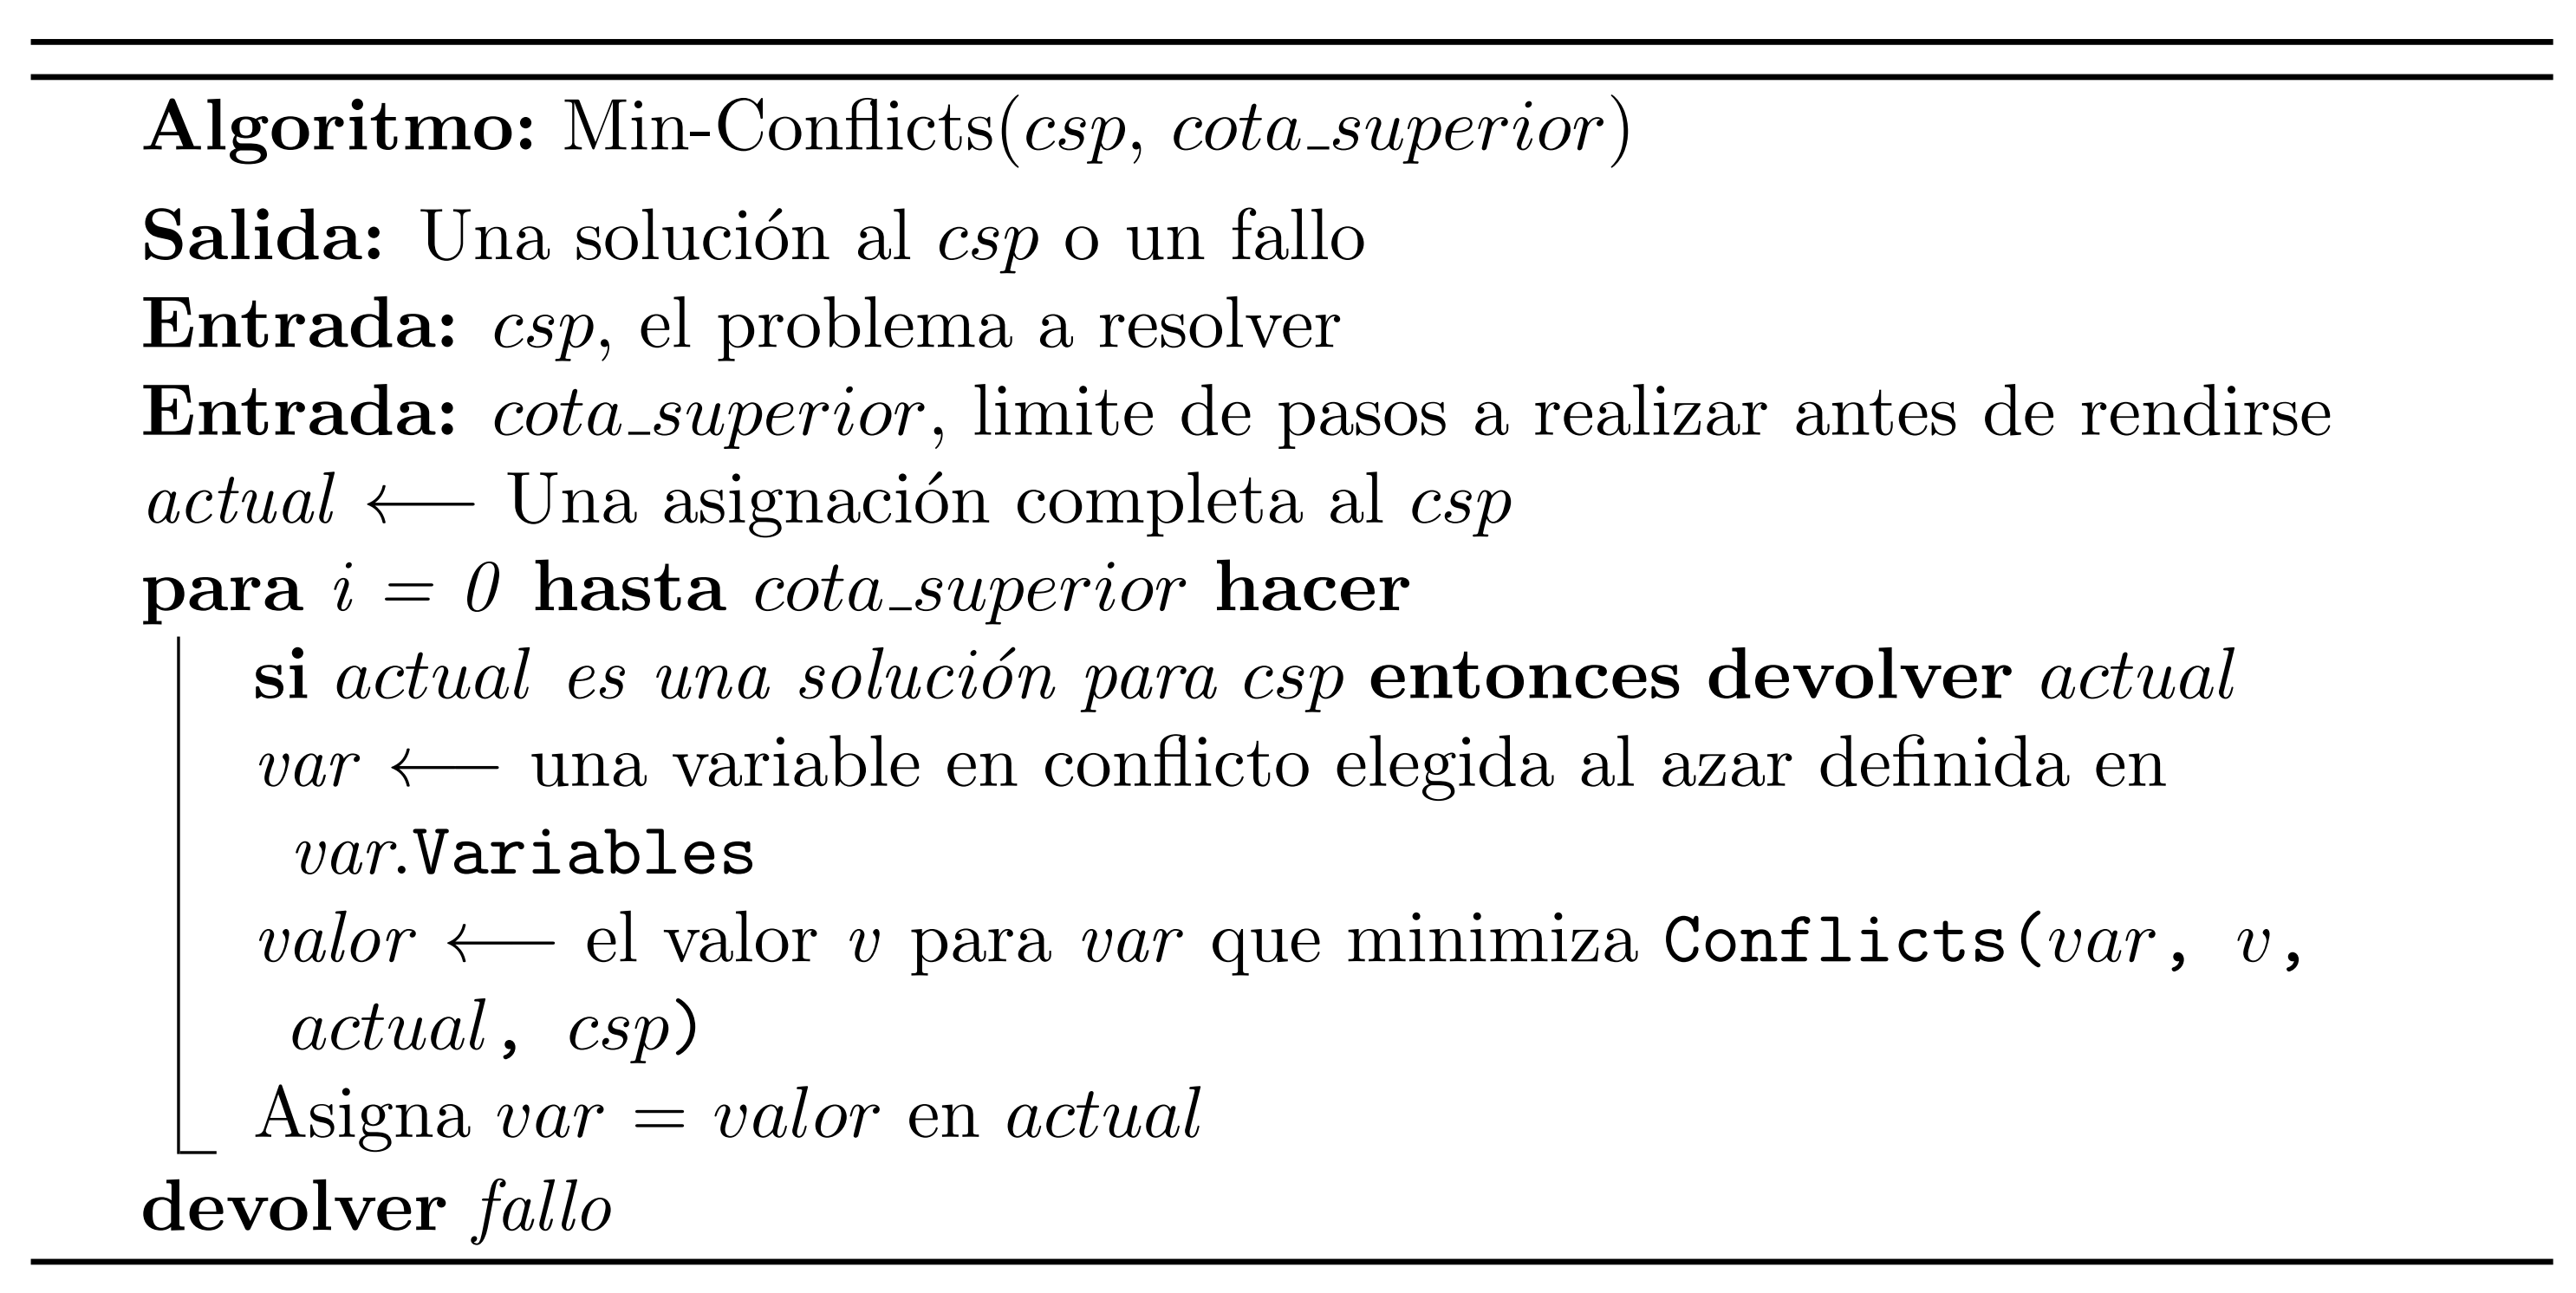

Norvirg y Russell comentan que Min-Conflicts es muy efectivo en la resolución de muchos CSPs<a>[1]</a><a href=https://www.researchgate.net/publication/24322715_The_min-conflicts_heuristic_Experimental_and_theoretical_results>[2]</a>. Menciona además que para problema de las $n-$reinas, si no se toma en cuenta la posición inicial de las reinas, el tiempo de ejecución de Min-Conflicts es más o menos independiente del tamaño del problema. Para $n=1\times10^6$ reinas, ¡se observa que resuelve el problema en promedio utilizando 50 pasos! (tras la asignación inicial). Esta observación ocasionó que se realizara mucha investigación respecto a búsqueda local en la época de los 90's y en la distinción entre problemas fáciles y difíciles. Norvirg y Russell argumentan en el libro que el problema de las $n-$reinas es fácil para búsqueda local porque las soluciones se encuentran distribuidas densamente por todo el espacio de estados. Este enfoque heurístico para solucionar problemas de la vida real ha sido empleado para programar tareas del telescópio espacial Hubble con excelentes resultados <a href=https://www.researchgate.net/publication/24322715_The_min-conflicts_heuristic_Experimental_and_theoretical_results>[2]</a>, ¡reduciendo el tiempo que se toma para programar una sema de observaciones de tres semanas a 10 minutos!.

El terreno de un CSP bajo la heuristica de min-conflicts tiene usualmente una serie de mesetas. Pueden existir millones de asignaciones a variables que estén a un sólo conflicto de la solución. Búsqueda sobre la meseta, permitiendo movimientos laterales hacia otro estado con el mísmo puntaje, puede ayudar a la búsqueda local a encontrar un escape de la meseta. Esta navegación sobre la meseta puede ser dirigida con una **búsqueda tabú**<a href=https://www.uv.es/~rmarti/paper/docs/ts1.pdf>[3]</a><a href=https://www.uv.es/rmarti/paper/docs/ts2.pdf>[4]</a>: manteniendo una lista pequeña de estados recientemente visitados y prohibiendo al algoritmo regresar a dichos estados.

Otra técnica, llamada **constraint weighting** o *ponderación de restricciones*, traducido al Español, puede ayudar a concentrar la búsqueda en las restricciones más importantes. A cada restricción se le asigna un peso numérico, $W_i$, inicialmente todos 1. En cada paso de la búsqueda, el algoritmo escoge un par variable-valor a modificar que resultará en el menor total de ponderaciones de todas las restricciones violadas. Las ponderaciones son entonces ajustadas al incrementar el peso de cada restricción que es violada por la asignación actual. Los beneficios agregados por esta estrategia son que a la meseta se le agrega topografía, asegurando la posibilidad de mejora del estado actual, y que conforme avanza el tiempo, las restricciones complicadas van acumulando más peso. La otra ventaja que brinda el enfoque de búsqueda local es que se adapta bien a cambios súbitos donde se requiere modificar ligeramente la solución. Considere el caso de la programación de vuelos en un aeropuerto, donde un cambio súbito en el clima provoca que el horario programado se vuelva invalido.

## Hill-Climbing

El algoritmo de búsqueda **hill-climbing** es simplemente un bucle que se mueve continuamente en la dirección en la que incrementa el valor, eso es *colina arriba*. Termina cuando alcanza una *cima* donde no hay vecinos con mayor valor. El algoritmo no mantiene un árbol de búsqueda, por lo que la estructura de datos para el nodo actual sólamente necesita mantener un registro del estado y el valor de la función objetivo. Hill-climbing no ve más allá de los vecinos inmediatos del estado actual.

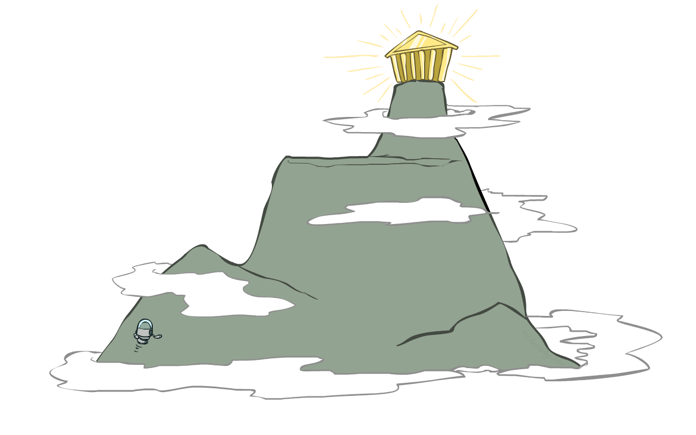

A continuación se presenta el pseudocódigo de Hill-Climbing

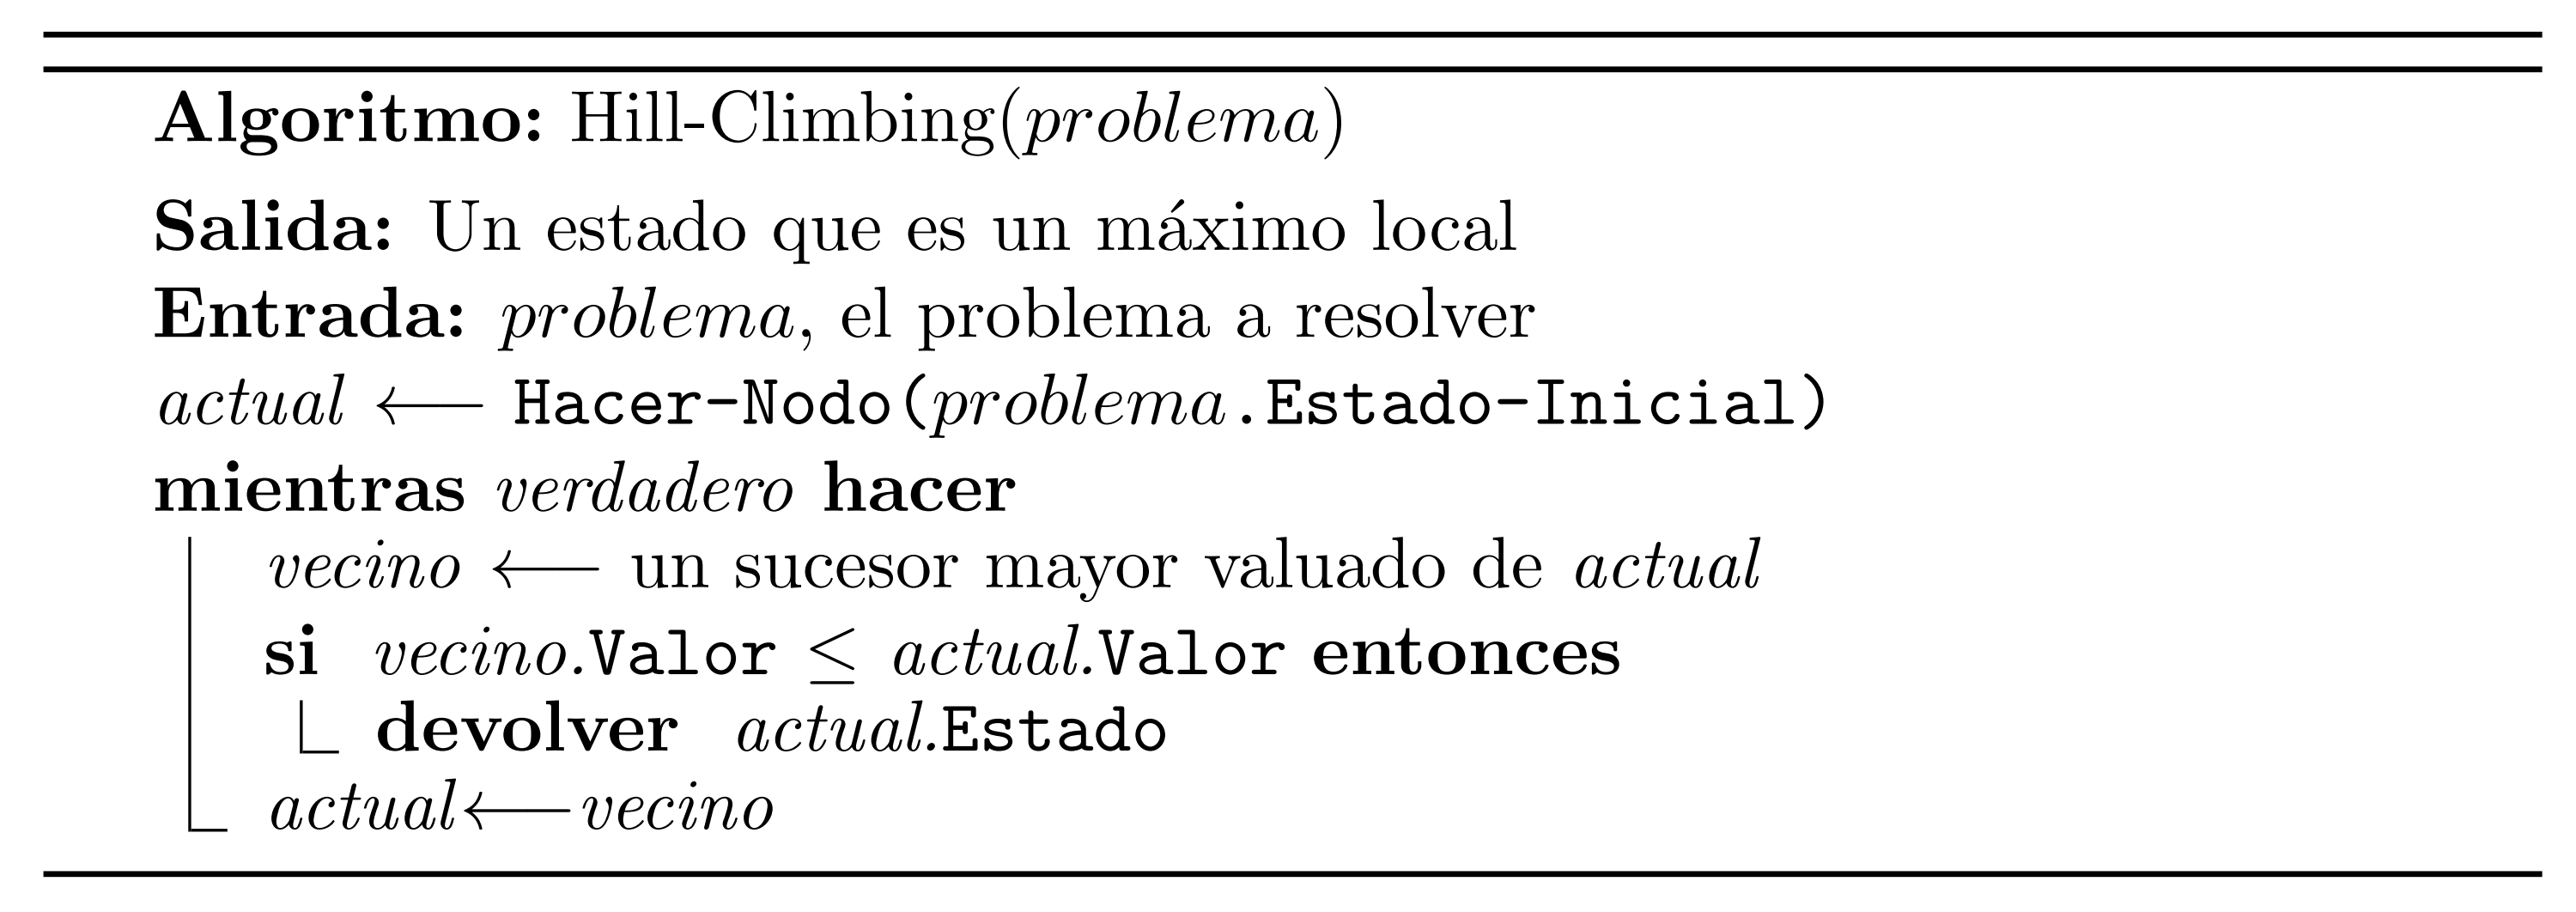

Tomemos como ejemplo para ilustrar Hill-Climbing el problema de las $n-$reinas para $n=8$. Como se ha mencionado, utilizamos una **formulación de estado completo**, donde cada variable que compone el CSP tiene asignado un valor. Los sucesores de un estado son todos los posibles estados generados al mover una sola reina a otra posición dentro de la columna ($8 \times 7 = 56$ sucesores). La función heuristica de costo $h$ es el número de pares de reinas que se atacan entre si de forma directa o indirecta. El mínimo global de esta función es cero, la cual ocurre sólamente en soluciones perfectas. Típicamente, para Hill-Climbing se suele utilizar de forma aleatoria entre un conjunto de los mejores sucesores si es que hay más que uno. Observe que en la figura (a) de abajo se muestra un estado con $h=17$. La figura también muestra los valores de todos sus sucesores, siendo el mejor sucesor aquel con $h=12$.

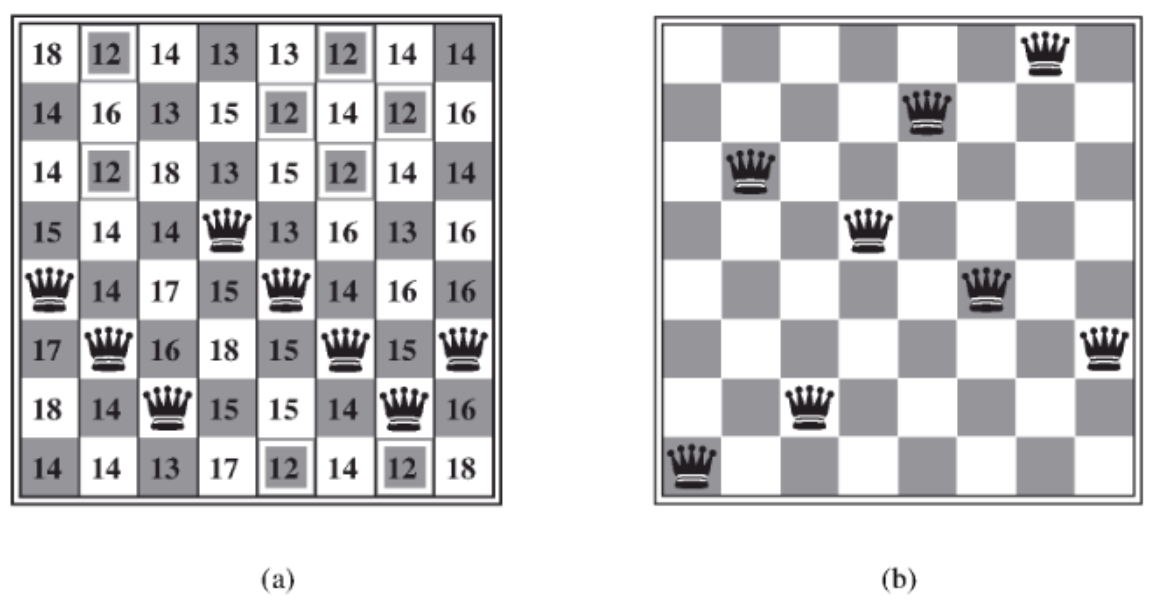

Lamentablemente no todo es perfecto en el mundo de la búsqueda local para Hill-Climbing, pues suele atorarse por los siguientes motivos:

   * **Máximo local**: Un máximo local es una cima que se encuentra más alta que cada uno de sus estados vecinos pero más baja que el máximo global. Observe que el estado (b) de la imágen que se encuentra arriba es un máximo local, pues cada movimiento de una sola reina hace a la situación peor.
   
   * **Crestas**: Las crestas son una secuencia de maximos locales que son difíciles de navegar para algoritmos voraces como Hill-Climbing.
   
   * **Mesetas**: Una meseta es una área plana dentro del terreno del espacio de estados. Puede ser un máximo local plano, donde no exíste ninguna salida hacia arriba, o una terraza, de la cual es posible realizar progreso. Una búsqueda por hill-climbing puede perderse en la meseta.

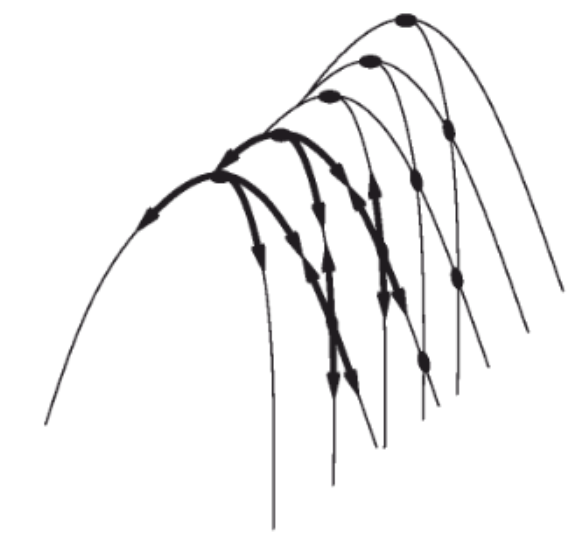
**Ejemplo de por qué las crestas ocasionan dificultades para hill-climbing. La rejilla de estados, indicadas por los círculos oscuros, se pone sobre una cresta que se eleva de izquierda a derecha y crea una secuencia de máximos locales que no están directamente relacionados el uno con el otro. De cada máximo local, todas las acciones disponibles se señalan cuesta abajo.**

# Ejercicios para el asistente

# Fuentes consultadas

<a href=#>[1]</a> RUSSEL, Stuart; NORVIG, Peter; <i>Artificial Intelligence: A modern approach</i>; Third Edition, Prentice Hall; New Jersey, EEUUA; p.p.1152, p.221 

<a href=https://www.researchgate.net/publication/24322715_The_min-conflicts_heuristic_Experimental_and_theoretical_results>[2]</a> MINTON S., PHILIPS B., JOHNSTON M. *et* LAIRD P.; *The min-conflicts heuristic: Experimental and theoretical results*; NASA Ames Research Center, AI Research Branch, 1991.

<a href=https://www.uv.es/~rmarti/paper/docs/ts1.pdf>[3]</a> GOVLER F., LAGUNA M. *et* MARTÍ R.; *Principles of Tabu Search*; University of Colorado, Leeds School of Business & Universidad de Valencia, Depto. de Estadística e Investigación Operativa, Fac. de Matemáticas.

<a href=https://www.uv.es/rmarti/paper/docs/ts2.pdf>[4]</a> GOVLER F. *et* MARTÍ R.; *Chapter 4: Tabu Search*; University of Colorado, Leeds School of Business & Universidad de Valencia, Depto. de Estadística e Investigación Operativa, Fac. de Matemáticas.